# Imports


In [1]:
import os
import cv2 
from deepface import DeepFace
from scipy.spatial.distance import cosine
from PIL import Image
import matplotlib.pyplot as plt

# Deeepface | ArcFace - Metric Learning

### cv2 - Extract_Faces

In [ ]:
def crop_eye_region(img_path): 
    try:
        face_objs = DeepFace.extract_faces(
            img_path=img_path,
            detector_backend='mtcnn',
            enforce_detection=True
        )
        facial_area = face_objs[0]['facial_area']
        img = cv2.imread(img_path)
        x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
        
        # Recortando a região superior da face, cerca de 60%
        y_end = y + int(h * 0.60)
        cropped_region = img[y:y_end, x:x+w]
        
        return cropped_region
    except Exception as e:
        # Decidi retornar a imagem original se o recorte falhar por algum motivo
        print(f"Aviso: Não foi possível recortar {img_path}, usando imagem original. Erro: {e}")
        return cv2.imread(img_path)

### Load - Database

In [5]:
main_folder = "post-processed"
reference_path = 'marcelinho_no_db.jpg'
test_image_path = 'marcelinho_na_inferencia.jpg'
model = 'ArcFace'

database = {}

if os.path.exists(main_folder):
    all_people = [p for p in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, p))]
    
    print(f"Encontradas {len(all_people)} pessoas para processar.")

    for person_name in all_people:
        try:
            person_folder_path = os.path.join(main_folder, person_name)
            first_image_name = os.listdir(person_folder_path)[0]
            full_image_path = os.path.join(person_folder_path, first_image_name)
            
            cropped_celebrity_img = crop_eye_region(full_image_path)
            
            if cropped_celebrity_img is not None:
                embedding = DeepFace.represent(cropped_celebrity_img, model_name=model, enforce_detection=False)[0]["embedding"]
                database[person_name] = embedding
                print(f"Vetor de '{person_name}' adicionado.")
        except Exception as e:
            print(f"ERRO ao processar '{person_name}': {e}")
else:
    print(f"ERRO: A pasta '{main_folder}' não foi encontrada.")

print(f"\nBanco de dados de celebridades criado com {len(database)} pessoas.")

Encontradas 2996 pessoas para processar.
Vetor de 'Aaron_Eckhart' adicionado.
Vetor de 'Aaron_Guiel' adicionado.
Vetor de 'Aaron_Peirsol' adicionado.
Vetor de 'Aaron_Sorkin' adicionado.
Vetor de 'Aaron_Tippin' adicionado.
Vetor de 'Abbas_Kiarostami' adicionado.
Vetor de 'Abdel_Aziz_Al-Hakim' adicionado.
Vetor de 'Abdel_Nasser_Assidi' adicionado.
Vetor de 'Abdoulaye_Wade' adicionado.
Vetor de 'Abdullah' adicionado.
Vetor de 'Abdullah_Gul' adicionado.
Vetor de 'Abel_Pacheco' adicionado.
Vetor de 'Abid_Hamid_Mahmud_Al-Tikriti' adicionado.
Vetor de 'Abraham_Foxman' adicionado.
Vetor de 'Adam_Ant' adicionado.
Vetor de 'Adam_Freier' adicionado.
Vetor de 'Adam_Kennedy' adicionado.
Vetor de 'Adam_Mair' adicionado.
Vetor de 'Adam_Rich' adicionado.
Vetor de 'Adam_Sandler' adicionado.
Vetor de 'Adolfo_Aguilar_Zinser' adicionado.
Vetor de 'Adolfo_Rodriguez_Saa' adicionado.
Vetor de 'Adoor_Gopalakarishnan' adicionado.
Vetor de 'Adrian_Annus' adicionado.
Vetor de 'Adrian_Fernandez' adicionado.
Vetor

### Add Marcelinho 

In [6]:
try:
    cropped_reference_img = crop_eye_region(reference_path)
    if cropped_reference_img is not None:
        target_embedding = DeepFace.represent(cropped_reference_img, model_name=model, enforce_detection=False)[0]["embedding"]
        database['marcelinho_correto'] = target_embedding
        print("Vetor da pessoa-alvo adicionado com sucesso.")
except Exception as e:
    print(f"ERRO ao adicionar a pessoa-alvo: {e}")

print(f"\nTamanho final do banco de dados: {len(database)} pessoas.")

Vetor da pessoa-alvo adicionado com sucesso.

Tamanho final do banco de dados: 2997 pessoas.


### Results


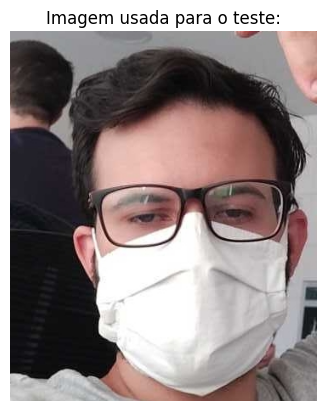


Pessoa Identificada: marcelinho_correto
Score da Métrica (Distância Cosseno): 0.1917

SUCESSO! O algoritmo conseguiu fazer o reconhecimento.


In [7]:
try:
    cropped_test_img = crop_eye_region(test_image_path)
    
    if cropped_test_img is not None:
        test_embedding = DeepFace.represent(cropped_test_img, model_name=model, enforce_detection=False)[0]["embedding"]

        lowest_distance = float('inf')
        recognized_identity = None

        for person_name, db_vector in database.items():
            dist = cosine(test_embedding, db_vector)
            if dist < lowest_distance:
                lowest_distance = dist
                recognized_identity = person_name
    
        display_img = Image.open(test_image_path)
        plt.imshow(display_img)
        plt.title("Imagem usada para o teste:")
        plt.axis('off')
        plt.show()

        print(f"\nPessoa Identificada: {recognized_identity}")
        print(f"Score da Métrica (Distância Cosseno): {lowest_distance:.4f}")

        # Verifica se o reconhecimento foi bem-sucedido
        if recognized_identity == 'marcelinho_correto':
            print("\n\033[1m\033[92mSUCESSO! O algoritmo conseguiu fazer o reconhecimento.\033[0m")
        else:
            print("\n\033[1m\033[91mFALHA. O algoritmo não identificou a pessoa correta.\033[0m")

except FileNotFoundError:
    print(f"ERRO: A imagem de teste '{test_image_path}' não foi encontrada.")
except Exception as e:
    print(f"Ocorreu um erro durante o reconhecimento: {e}")